# QED-C Application-Oriented Benchmarks - Quantum Reinforcement Learning

- The notebook contains specific examples for the Quantum Reinforcement Learning benchmark program.
- Configure and run the cell below with the desired execution settings.
- Then configure and run the remaining cell(s), each one a variation of this benchmark.

In [2]:
%reload_ext autoreload
%autoreload 2

## Configure backend options
- In the following we import the QRL benchmark module
- Set the relevant parameters for execution on real quantum hardware device

In [3]:
import qrl_benchmark
backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":"cpu" }

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })

### QRL Benchmark Method 1

In method 1, we provide a method to execute just the QRL ansatz and not the entire loop. 
- **Inputs** - *min_qubits, max_qubits, skip_qubits, max_circuits, num_shots, num_layers, init_state*
- **Outputs** - Volumetric plot, fidelity and timing plot

Quantum-Reinforcement-Learning (1) Benchmark Program
... execution starting at Aug 29, 2025 18:57:52 UTC
************
Executing circuit with num_qubits = 4
************
Executing circuit with num_qubits = 5
************
Executing circuit with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 27, 0.214
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 36, 0.195, 15.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 0.481, 0.044 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.992, 0.952

************
Executing circuit with num_qubits = 7
************
Executing circuit with num_qubits = 8
************
Executing circuit with num_qubits = 9
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 27, 0.235
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5

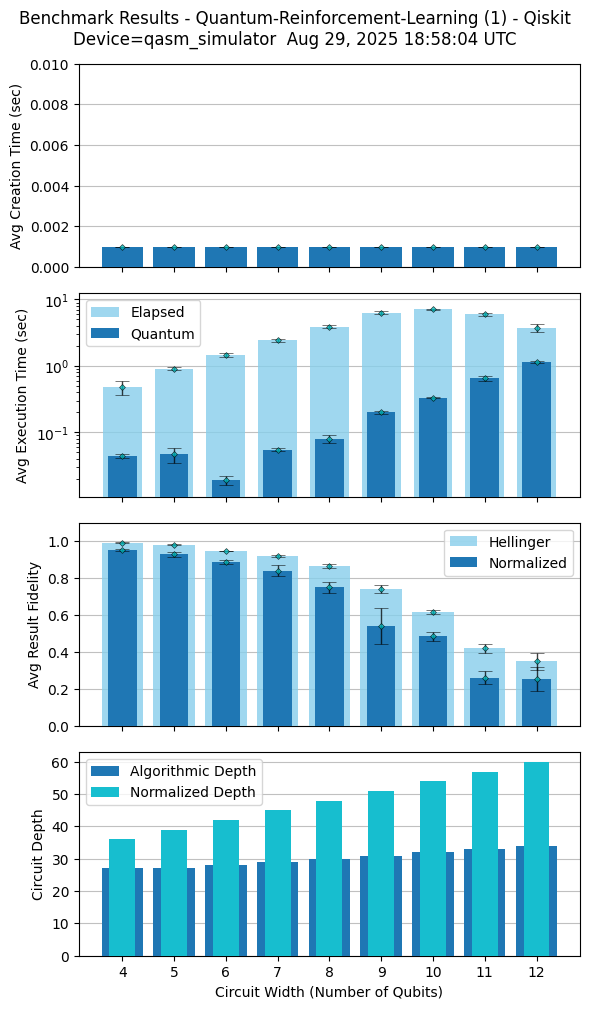

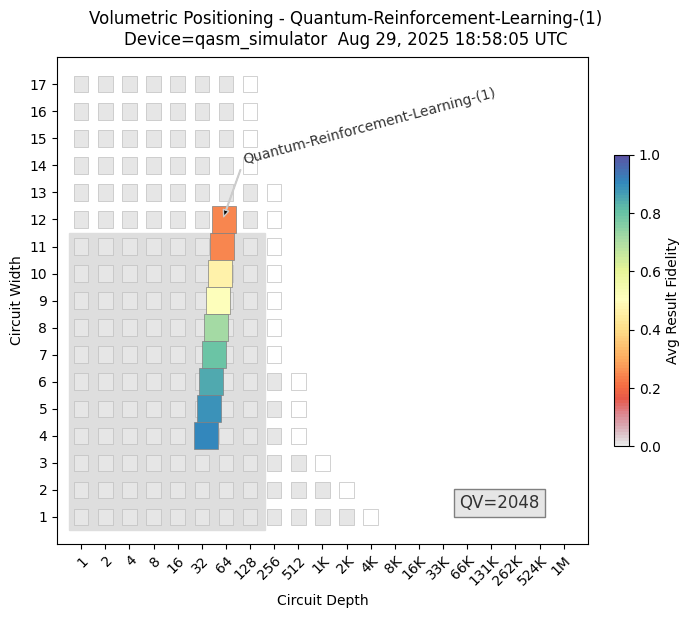

In [ ]:
api = "qiskit" # qiskit or cudaq
min_qubits = 4
max_qubits = 12
skip_qubits = 1
max_circuits = 3
num_layers = 5
num_shots = 1000
init_state = 7
data_reupload = True

qrl_benchmark.run(api=api, min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits, max_circuits=max_circuits, num_layers=num_layers, num_shots=num_shots, init_state=init_state, data_reupload=data_reupload, method = 1,backend_id=backend_id, hub=hub, group=group, project=project, exec_options=exec_options)

## QRL Benchmark - Method 2

In this method we can benchmark the entire QRL loop featuring a 4x4 FrozenLake module.

**Note:** To run method 2 there is an additional dependency of Gymnasium library. Use `pip install gymnasium`.

Quantum-Reinforcement-Learning (2) Benchmark Program


/Users/hrushikeshpatil/miniconda3/envs/SRI/lib/python3.12/site-packages/qiskit/compiler/transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(


============ QRL Metrics:
  Circuit Evaluations: 11
  Gradient Evaluations: 0
  Environment Evaluations: 99
  Number of Successes: 0
  Number of Episodes: 9
  Total Steps: 50
  Explore Steps: 39
  Exploit Steps: 11
  Average Return per Run: 0.0
  Average Return per Episode: 0.0
  Total Time: 0.4081 seconds
  Quantum Time: 0.4014 seconds
  Step Time: 0.3704 seconds
  Environment Time: 0.0011 seconds
  Gradient Time: 0.0000 seconds
  Average Step Time: 0.0074 seconds
============ QRL Metrics:
  Circuit Evaluations: 49
  Gradient Evaluations: 0
  Environment Evaluations: 176
  Number of Successes: 0
  Number of Episodes: 24
  Total Steps: 100
  Explore Steps: 51
  Exploit Steps: 49
  Average Return per Run: 0.0
  Average Return per Episode: 0.0
  Total Time: 1.8889 seconds
  Quantum Time: 1.8703 seconds
  Step Time: 1.8464 seconds
  Environment Time: 0.0030 seconds
  Gradient Time: 0.0000 seconds
  Average Step Time: 0.0185 seconds
============ QRL Metrics:
  Circuit Evaluations: 729
  Gr

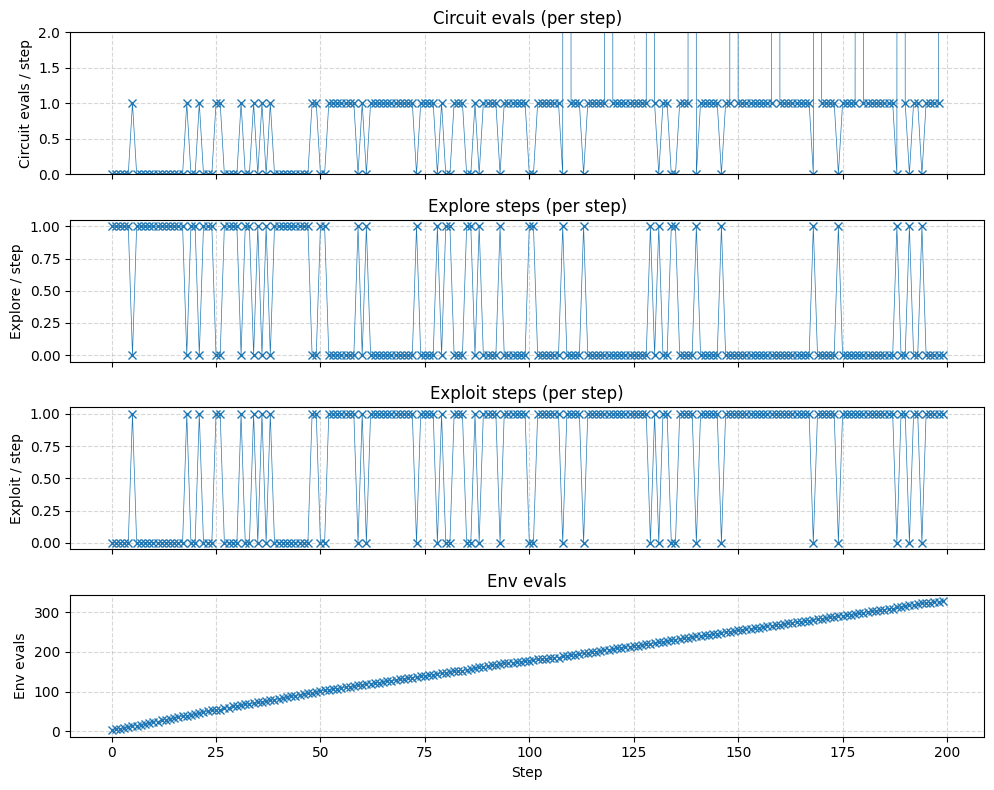

╔════════════════════════════════════════╗
║         QRL Benchmark Metrics          ║
╠════════════════════════════════════════╣
║                 TOTALS                 ║
╟════════════════════════════════════════╢
║ Circuit Evaluations        │    1414   ║
║ Gradient Evaluations       │     640   ║
║ Environment Evaluations    │     327   ║
║ Number of Successes        │       0   ║
║ Number of Episodes         │      60   ║
║ Total Steps                │     200   ║
║ Explore Steps              │      66   ║
║ Exploit Steps              │     134   ║
╠════════════════════════════════════════╣
║                AVERAGES                ║
╟════════════════════════════════════════╢
║ Average Return per Run     │  0.0000   ║
║ Average Return per Episode │  0.0000   ║
║ Average Step Time (s)      │  0.3090   ║
╠════════════════════════════════════════╣
║                TIMINGS                 ║
╟════════════════════════════════════════╢
║ Total Time (s)             │ 61.7889   ║
║ Quantum T

In [7]:
api = "qiskit" # qiskit or cudaq
num_layers = 3
num_shots = 1000
data_reupload = True
exec_options = {"noise_model": None} # {} for noisy

qrl_benchmark.run(api=api, num_layers=num_layers, num_shots=num_shots, data_reupload=data_reupload, method = 2, backend_id=backend_id, hub=hub, group=group, project=project, exec_options=exec_options)